# Chapter 5. Time series regression models
## Section 5.1 The linear model

In [1]:
import pandas as pd
import datetime
from math import pi
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = 'AppleGothic'

import seaborn as sns
import seaborn; seaborn.set()

import statsmodels.api as sm
import sklearn as sk
from sklearn import linear_model

from pylab import rcParams
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

### Simple linear regression

$$ y_t = \beta_0 + \beta_1 x_t + \epsilon_t $$



**Example: US consumption expenditure**

In [2]:
uschange_data = sm.datasets.get_rdataset('uschange', package='fpp2')

uschange= uschange_data.data
uschange['Year'] = pd.date_range(start='1970', end='12/30/2016', freq='Q')
uschange.head()

/Users/yunypark/miniconda3/envs/yuny_fpp/lib/python3.7/site-packages/statsmodels/datasets/utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


,Consumption,Income,Production,Savings,Unemployment,Year
0,0.615986,0.972261,-2.452700,4.810312,0.9,1970-03-31
1,0.460376,1.169085,-0.551525,7.287992,0.5,1970-06-30
2,0.876791,1.553271,-0.358708,7.289013,0.5,1970-09-30
3,-0.274245,-0.255272,-2.185455,0.985230,0.7,1970-12-31
4,1.897371,1.987154,1.909734,3.657771,-0.1,1971-03-31


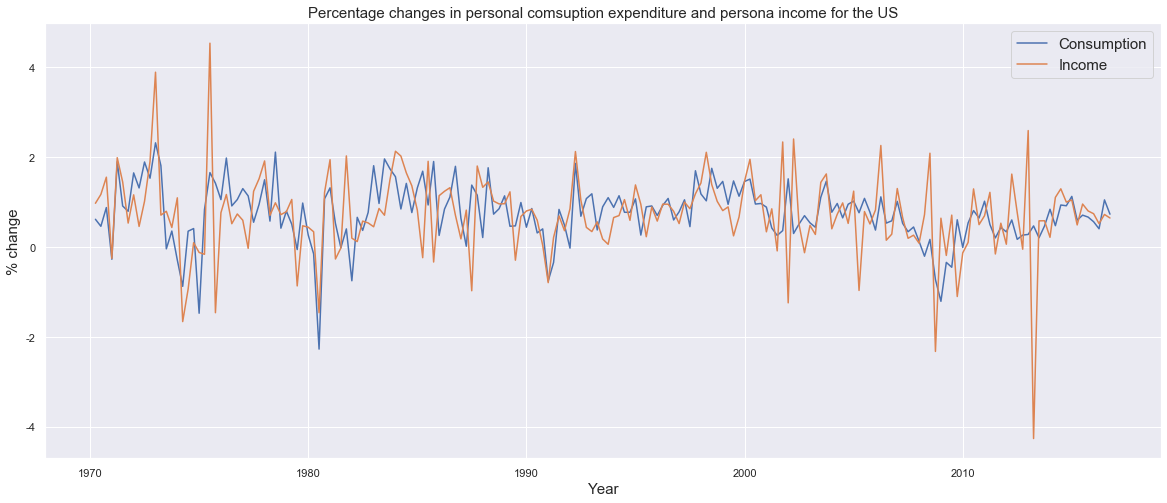

In [3]:
fig = plt.subplots(figsize=(20,8))
plt.plot(uschange['Year'], uschange['Consumption'],label='Consumption')
plt.plot(uschange['Year'], uschange['Income'], label='Income')
plt.xlabel('Year', fontsize=15)
plt.ylabel('% change', fontsize=15)
plt.title('Percentage changes in personal comsuption expenditure and persona income for the US', fontsize=15)
plt.legend(fontsize=15)
plt.show()

A scatter plot of consumption changes against income changes is shown in Figure 5.3 along with the estimated regression line
$$\hat{y}_t = 0.55 + 0.28 x_t $$

Coefficients: 	 [0.28060125]
Intercept: 	 [0.54510381]


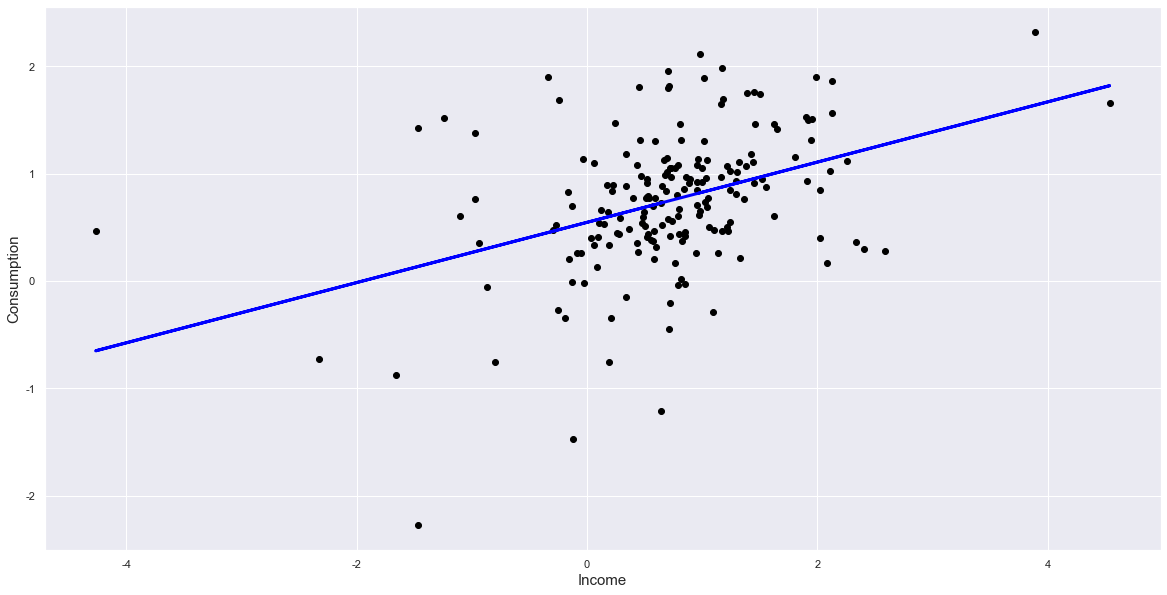

In [4]:
length = uschange.shape[0]
X = np.array(uschange['Income'])
Y = np.array(uschange['Consumption'])

X = X.reshape(length, 1)
Y = Y.reshape(length, 1)

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Coefficients: \t', regr.coef_[0])
print('Intercept: \t', regr.intercept_)


# Plot outputs
fig = plt.subplots(figsize=(20,10))

plt.scatter(X, Y, color='black')
y = regr.coef_*X + regr.intercept_
plt.plot(X, y, color='blue', linewidth=3)
plt.xlabel('Income', fontsize=15)
plt.ylabel('Consumption', fontsize=15)
plt.show()

### Multiple linear regression
$$ y_t = \beta_0 + \beta_1 x_{1,t} +\beta_2 x_{2,t} + \cdots + \beta_k x_{k,t} + \epsilon_t$$

Linear regression fits a linear model with coefficients $\beta=(\beta_0,\beta_1,\cdots,\beta_k) $ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.Mathematically it solves a problem of the form
$${\rm{min}}_w||X_t\beta-y_t||^2_2$$ 



**Example: US consumption expenditure**

In [5]:
uschange

,Consumption,Income,Production,Savings,Unemployment,Year
0,0.615986,0.972261,-2.452700,4.810312,0.9,1970-03-31
1,0.460376,1.169085,-0.551525,7.287992,0.5,1970-06-30
2,0.876791,1.553271,-0.358708,7.289013,0.5,1970-09-30
3,-0.274245,-0.255272,-2.185455,0.985230,0.7,1970-12-31
4,1.897371,1.987154,1.909734,3.657771,-0.1,1971-03-31
...,...,...,...,...,...,...
182,0.664970,0.801663,0.380606,3.180930,-0.3,2015-09-30
183,0.561680,0.740063,-0.845546,3.482786,0.0,2015-12-31
184,0.404682,0.519025,-0.417930,2.236534,0.0,2016-03-31
185,1.047707,0.723721,-0.203319,-2.721501,-0.1,2016-06-30


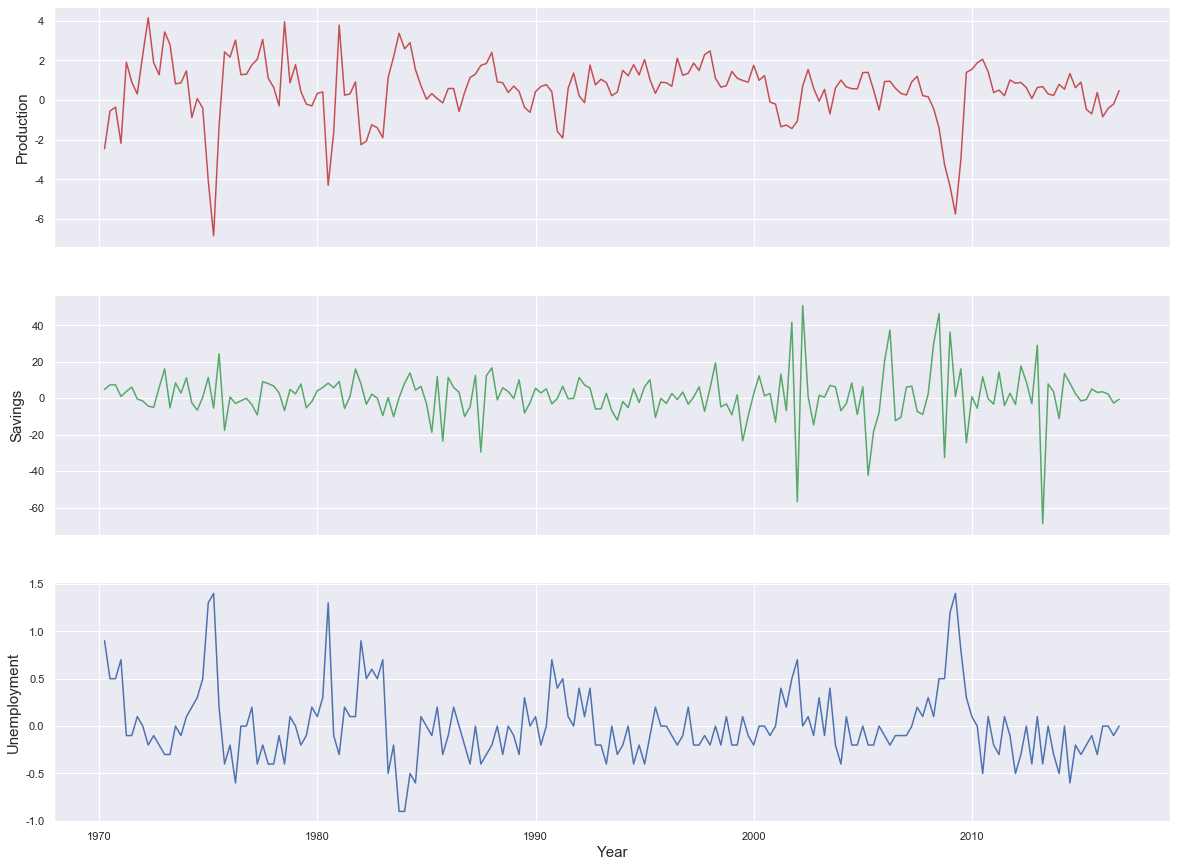

In [6]:
fig ,axes= plt.subplots(nrows=3, ncols=1, figsize=(20,15), sharex='all')
axes[0].plot(uschange['Year'], uschange['Production'], color='r')
axes[0].set_ylabel('Production', fontsize=15)

axes[1].plot(uschange['Year'], uschange['Savings'], color='g')
axes[1].set_ylabel('Savings', fontsize=15)

axes[2].plot(uschange['Year'], uschange['Unemployment'], color='b')
axes[2].set_ylabel('Unemployment', fontsize=15)

plt.xlabel('Year', fontsize=15)
plt.show()

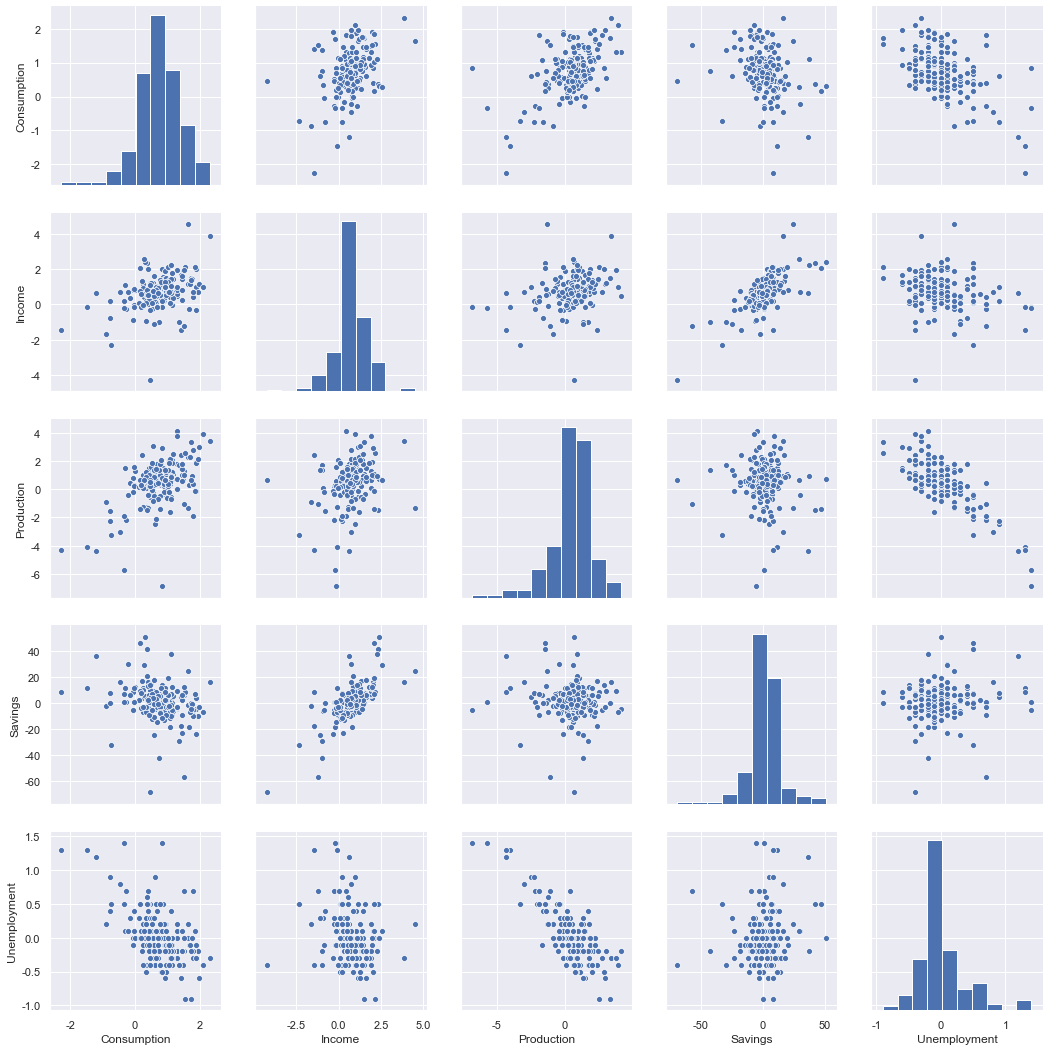

In [13]:
g = sns.pairplot(uschange)
g.fig.set_figwidth(15)
g.fig.set_figheight(15)
plt.show()

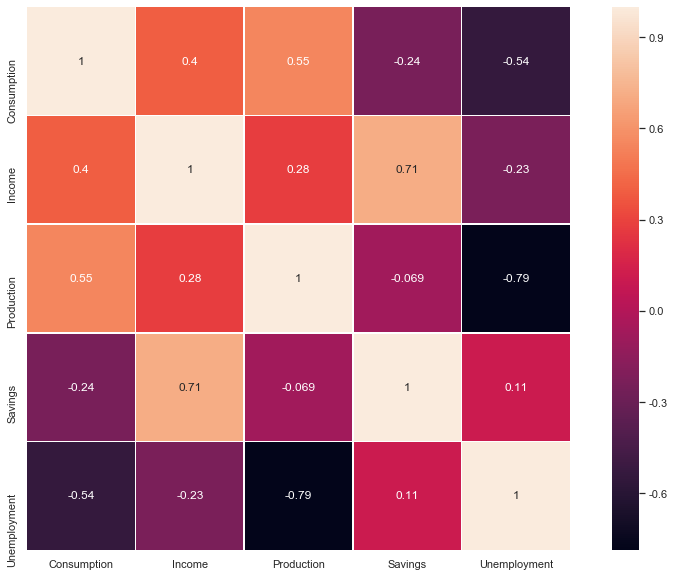

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(uschange.corr(), annot=True, linewidths=0.5, ax=ax, square=True)

plt.show()

## Section 5.2 Least square estimation

The least squares principle provides a way of choosing the coefficients effectively by minimising the sum of the squared errors. That is, we choose the values of $\beta_0,\beta_1,\cdots,\beta_k$ that minimise
$$\sum_{t=1}^{T}\epsilon^1_t = \sum_{t=1}^{T}(y_t-\beta_0-\beta_1 x_{1,t}-\beta_2 x_{2,t}-\cdots-\beta_k x_{k,t})^2$$

For the above example, a multiple linear regression model for US consumption is
$$y_t = \beta_0 + \beta_1 x_{1,t} + \beta_2 x_{2,t} + \beta_3 x_{3,t} + \beta_4 x_{4,t} + \epsilon_t$$
where $y$ is the percentage change in real personal consumption expenditure, $x_1$ is the percentage change in real personal disposable income, $x_2$ is the percentage change in industrial production, $x_3$ is the percentage change in personal savings and $x_4$ is the change in the unemployment rate.


Coefficients: 	 [ 0.71448464  0.04589098 -0.04526925 -0.20476616]
Intercept: 	 [0.26728858]


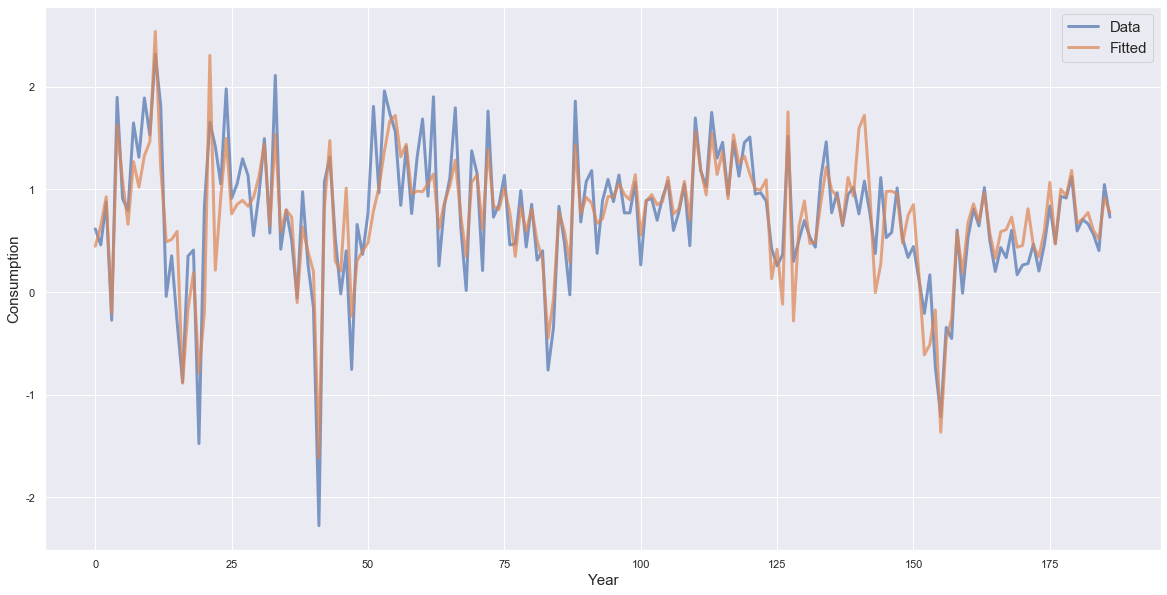

In [51]:
length = uschange.shape[0]
X = np.array(uschange[['Income', 'Production', 'Savings', 'Unemployment']])
Y = np.array(uschange['Consumption'])
# X = X.reshape(length, 1)
Y = Y.reshape(length, 1)

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Coefficients: \t', regr.coef_[0])
print('Intercept: \t', regr.intercept_)


# # Plot outputs
fig = plt.subplots(figsize=(20,10))

# plt.scatter(X, Y, color='black')
plt.plot(Y, linewidth=3, alpha=0.7, label='Data')
y = regr.predict(X)

plt.plot(y, linewidth=3, alpha=0.7, label='Fitted')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Consumption', fontsize=15)
plt.legend(fontsize=15)
plt.show()